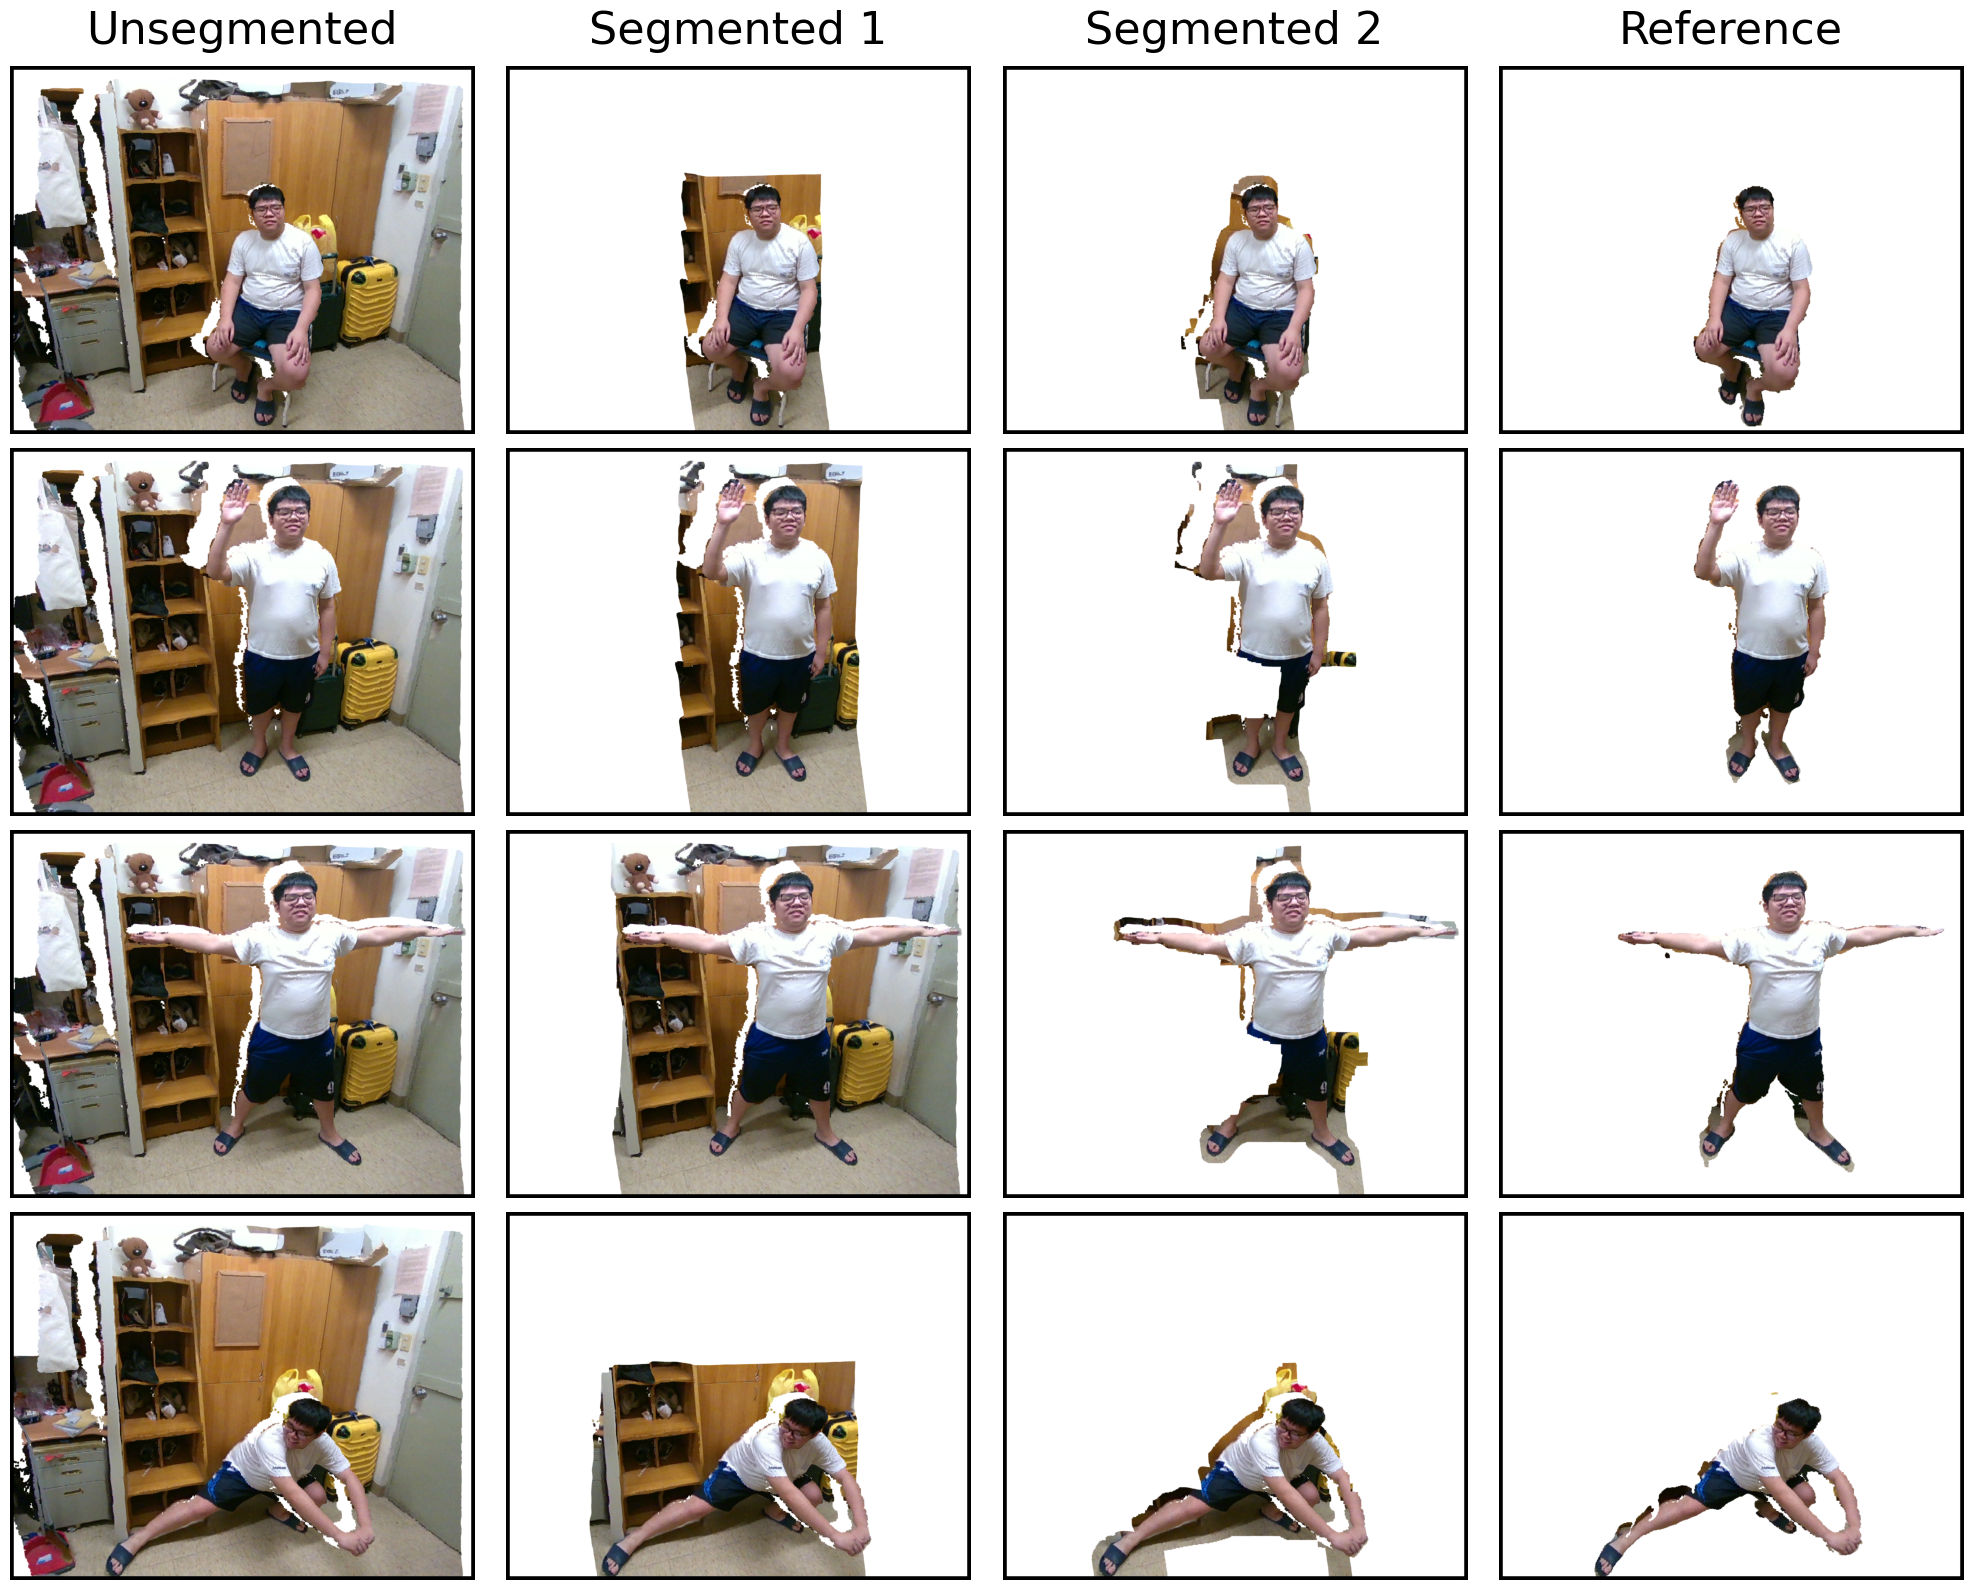

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def get_all_imgs_path():
    pc_imgs = []
    reference_imgs = []
    segmented_imgs = []
    segmented2_imgs = []

    for root, dirs, files in os.walk('./output/bg1'):
        for file in files:
            if file == 'pc.png':
                pc_imgs.append(os.path.join(root, file))
            if file == 'reference.png':
                reference_imgs.append(os.path.join(root, file))
            if file == 'segmented.png':
                segmented_imgs.append(os.path.join(root, file))
            if file == 'segmented2.png':
                segmented2_imgs.append(os.path.join(root, file))

    for root, dirs, files in os.walk('./output/bg2'):
        for file in files:
            if file == 'pc.png':
                pc_imgs.append(os.path.join(root, file))
            if file == 'reference.png':
                reference_imgs.append(os.path.join(root, file))
            if file == 'segmented.png':
                segmented_imgs.append(os.path.join(root, file))
            if file == 'segmented2.png':
                segmented2_imgs.append(os.path.join(root, file))

    return pc_imgs, reference_imgs, segmented_imgs, segmented2_imgs

def crop_image(img_path, left, right, top, border_size=10, border_color='black'):
    img = Image.open(img_path)
    width, height = img.size
    img_cropped = img.crop((left, top, width - right, height))
    img_with_border = ImageOps.expand(img_cropped, border=border_size, fill=border_color)
    return img_with_border

pc_imgs, reference_imgs, segmented_imgs, segmented2_imgs = get_all_imgs_path()

# plot pc.png, reference.png, segmented.png, and segmented2.png
# in 25 * 4 subplots
# column = [pc, segmented, segmented2, reference]
# row = zip(pc_imgs, segmented_imgs, segmented2_imgs, reference_imgs)

# Define the order of the images
order = [0, 1, 10, 24]

# Rearrange the images
pc_imgs = [pc_imgs[i] for i in order]
reference_imgs = [reference_imgs[i] for i in order]
segmented_imgs = [segmented_imgs[i] for i in order]
segmented2_imgs = [segmented2_imgs[i] for i in order]

rows = len(order)

crop_left = 450
crop_right = 260
crop_top = 100

column_names = ['Unsegmented', 'Segmented 1', 'Segmented 2', 'Reference']

fig, axs = plt.subplots(rows, 4, figsize=(20, rows * 4))
# Adjust the space between rows
fig.subplots_adjust(hspace=0.2)

for i, (pc, segmented, segmented2, reference) in enumerate(zip(pc_imgs, segmented_imgs, segmented2_imgs, reference_imgs)):
    axs[i, 0].imshow(crop_image(pc, crop_left, crop_right, crop_top))
    axs[i, 0].axis('off')
    axs[i, 1].imshow(crop_image(segmented, crop_left, crop_right, crop_top))
    axs[i, 1].axis('off')
    axs[i, 2].imshow(crop_image(segmented2, crop_left, crop_right, crop_top))
    axs[i, 2].axis('off')
    axs[i, 3].imshow(crop_image(reference, crop_left, crop_right, crop_top))
    axs[i, 3].axis('off')

    # Add column names to the first row
    if i == 0:
        for j, column_name in enumerate(column_names):
            axs[i, j].set_title(column_name, fontsize=32, pad=16)

    if i == rows - 1:
        break

plt.tight_layout()
plt.show()